In [1]:
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname((os.path.abspath(""))))

In [2]:
from src.pipeline import Pipeline

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
pipeline = Pipeline()

In [4]:
pipeline.setup()

In [6]:
pipeline.preprocess()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 633.77it/s]


In [7]:
pipeline.create_all_features()

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1009.77it/s]


In [8]:
pipeline.features

,qID,pID,y,w2v_cosine,w2v_euclidean,w2v_manhattan,tfidf_cosine,tfidf_euclidean,tfidf_manhattan,bert_cosine,...,polarity_doc,subjectivity_query,polarity_query,bm25,doc_nouns,doc_adjectives,doc_verbs,query_nouns,query_adjectives,query_verbs
0,603195,7050012,1,0.998277,43.748993,352.512423,0.494442,1.005542,4.500760,0.899372,...,0.000000,0.00,0.0,-23.010393,23,6,4,3,1,1
1,474183,325505,1,0.999367,58.709507,475.378122,0.718991,0.749678,2.827217,0.880772,...,0.450000,0.00,0.0,-29.039885,18,9,3,4,0,0
2,320545,1751825,1,0.994219,36.255341,291.556178,0.465010,1.034399,3.510038,0.582573,...,0.500000,0.20,0.2,-17.802906,20,2,14,2,1,1
3,89798,5069949,1,0.999236,55.643715,445.979134,0.550941,0.947691,5.151592,0.731121,...,0.066667,0.25,0.0,-27.838059,25,10,5,3,1,0
4,1054603,2869106,1,0.999490,56.862362,456.367451,0.477181,1.022564,4.883478,0.774794,...,0.000000,0.00,0.0,-26.300113,20,9,6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1165107,2078953,0,0.864736,47.285110,379.785401,0.486079,1.013825,4.720156,0.482285,...,0.113333,0.00,0.0,-9.763731,14,7,5,1,0,2
196,309227,718432,0,0.994451,41.472218,334.419555,0.585357,0.910651,3.088088,0.506990,...,0.362500,0.20,0.2,-16.445817,14,8,10,3,1,1
197,594675,2996694,0,0.998796,35.998909,288.832000,0.234104,1.237656,3.768051,0.275192,...,0.125000,0.00,0.0,-8.541818,15,6,6,1,1,1
198,905486,7669113,0,0.988935,27.124987,219.380202,0.648006,0.839039,3.419409,0.554341,...,0.150000,0.00,0.0,-26.416549,7,7,6,2,1,2


### Correlation Matrix

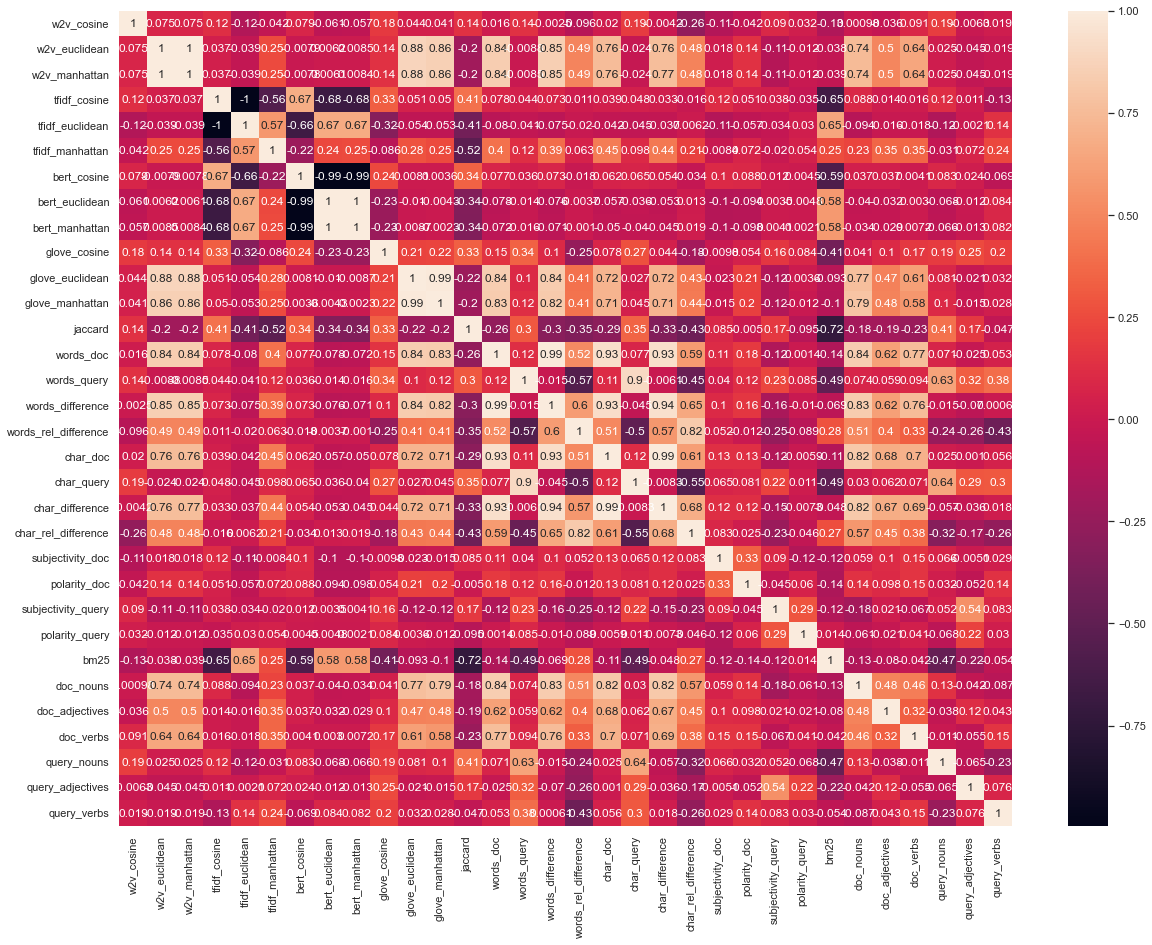

In [12]:
corr = pipeline.features.drop(columns=['qID', 'pID', 'y']).corr()
sn.set(rc = {'figure.figsize':(20,15)})
sn.heatmap(corr, annot=True)
plt.show()

### Forward Selection

In [8]:
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical

logistic_regression_search_space: list = []
logistic_regression_search_space.append(Categorical(['l2', 'none'], name='penalty'))
logistic_regression_search_space.append(Real(0.1, 100.0, name='C'))
logistic_regression_search_space.append(Real(1e-6, 0.1, name='tol'))

In [ ]:
pipeline.forward_selection('lr', 0, logistic_regression_search_space)

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1169.35it/s]
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  w

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.5056179775280899
Best Hyperparameters: ['l2', 64.31372762431822, 0.005846781627925853]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00015872187698230715
Best Hyperparameters: ['l2', 5.420323661403363, 0.014643869689446361]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0001587633953777656
Best Hyperparameters: ['none', 46.89126995592102, 0.04473570515000639]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 54.31723368845467, 0.093517786984683]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['none', 59.41027417698724, 0.08396899945332588]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.18840579710144928
Best Hyperparameters: ['none', 89.0132708279421, 0.08745030911762681]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['none', 46.759949751168335, 0.07069599251164119]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['none', 20.597256890432742, 0.029794890564708576]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 94.03189259174695, 0.0975718077275486]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.625
Best Hyperparameters: ['none', 83.1867220161569, 0.004293012054418169]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00012273580419628873
Best Hyperparameters: ['none', 28.87365338445026, 0.08200649849322289]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00011986502317093811
Best Hyperparameters: ['none', 98.99619502544881, 0.07693212397667878]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 7.878276647539371, 0.0011190581375447642]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00020096586751347902
Best Hyperparameters: ['none', 21.23424626861296, 0.0897283867380711]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00023397929971371944
Best Hyperparameters: ['none', 63.2880062115124, 0.09982271043105333]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00020096586751347902
Best Hyperparameters: ['none', 55.38022186907232, 0.012192218670861201]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00020096586751347902
Best Hyperparameters: ['none', 59.75758426433651, 0.07476377699074122]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0002054479959734112
Best Hyperparameters: ['none', 32.43683429223072, 0.04457218263474644]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0001876814603283395
Best Hyperparameters: ['l2', 47.17977914365361, 0.06441375032571586]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00021062287966985407
Best Hyperparameters: ['l2', 50.20717373617949, 0.07706992543208711]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00023247567711801685
Best Hyperparameters: ['l2', 27.419338516556454, 0.08441636577862227]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0009188046590821144
Best Hyperparameters: ['none', 89.81288244161014, 0.021025299315170217]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0004281694290749179
Best Hyperparameters: ['l2', 5.3429021010118225, 0.04306482906042544]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00023403677118278765
Best Hyperparameters: ['l2', 83.22483172588474, 0.022860159588260456]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0001876814603283395
Best Hyperparameters: ['l2', 82.44449365118614, 0.00991919970694944]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 81.35205093315122, 0.016284305423731722]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.000363057444193941
Best Hyperparameters: ['none', 51.324194792095284, 0.07433514052286785]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00019700667514058323
Best Hyperparameters: ['l2', 78.78719532469444, 0.08993651683584364]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00011769044226278661
Best Hyperparameters: ['none', 9.883018012152721, 0.08163451390387905]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.0001876814603283395
Best Hyperparameters: ['l2', 92.99481808229653, 0.08908234113369601]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00023397929971371944
Best Hyperparameters: ['none', 73.50641577768384, 0.07251720901965415]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.00023397929971371944
Best Hyperparameters: ['none', 6.43324736059215, 0.020111046475952264]
MRR on test set: 
Current features: ['tfidf_cosine']
Current Performance: 0.75


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 75.22154229885267, 0.004086110111250449]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 56.16415780012853, 0.09934935897665843]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['none', 92.53881787333303, 0.007165426199227701]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 78.72437815719216, 0.049419060440886384]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 85.22918201559163, 0.015984991485243506]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 38.41771177430976, 0.05569384620504053]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 17.06184108227981, 0.0843758645866383]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 86.54670173951652, 0.006382159134188601]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 97.00174207645456, 0.013797876855361471]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 60.54502244694567, 0.06813608837927723]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 5.572182241121159, 0.07933577762338798]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['l2', 40.64994472850147, 0.0637164178189524]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['none', 44.680942392690255, 0.04782252066098076]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Best MRR: 0.75
Best Hyperparameters: ['none', 69.45039609593005, 0.08840053966019869]
MRR on test set: 


/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

KeyboardInterrupt: 